<a href="https://colab.research.google.com/github/Afsoon-Ghazanfari/DataScienceRoadmap/blob/main/1_Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Classification Project**

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

In [ ]:
#Connecting to the Google Drive and creating dataframes
from google.colab import drive
drive.mount('/content/drive')

df1=pd.read_csv('/content/drive/My Drive/winequality-red.csv', sep=';')
df1.head()

Mounted at /content/drive


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df1['type']='red'
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [ ]:
df2=pd.read_csv('/content/drive/My Drive/winequality-white.csv', sep=';')
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df2['type']='white'
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [ ]:
#Merge dataframes without loosing any data
df=pd.merge(df1, df2, how='outer')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red


In [ ]:
#Reorder columns
new_column_order =['type','fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

df=df.reindex(columns=new_column_order)
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
2,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
3,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


#Exploratory Data Analysis

In [ ]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


#Visualisation


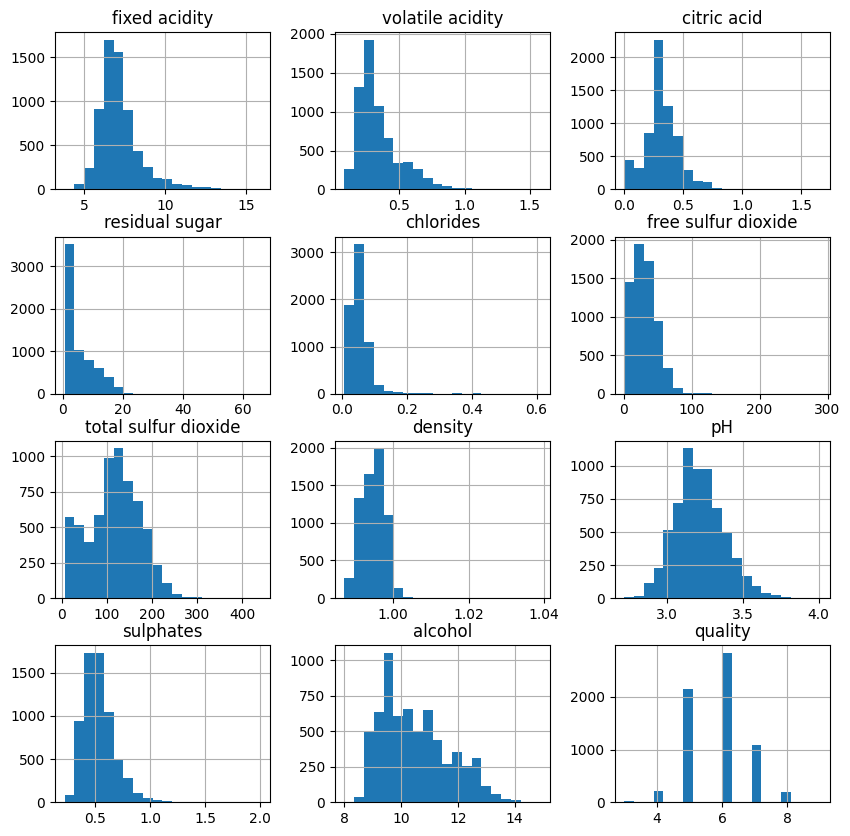

In [ ]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

<Axes: >

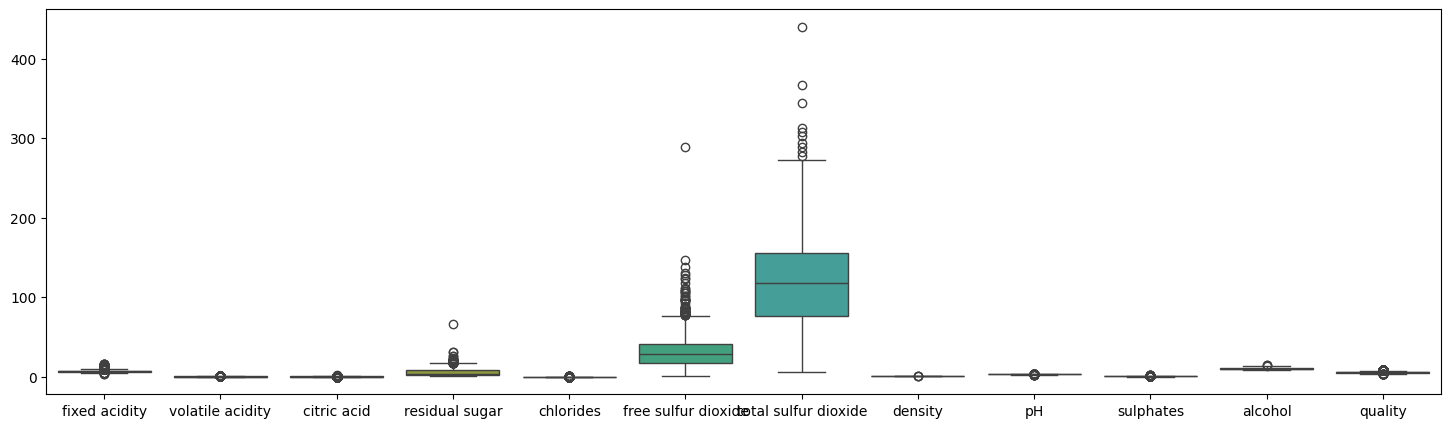

In [ ]:
plt.figure(figsize=(18, 5))
sns.boxplot(df)
#to see outliers

<Axes: xlabel='quality', ylabel='alcohol'>

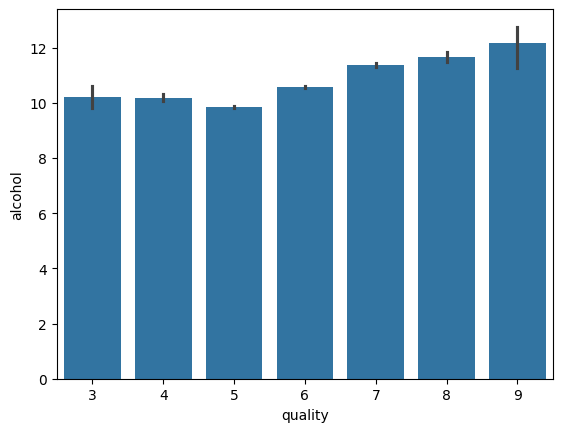

In [ ]:
sns.barplot(x=df['quality'],y=df['alcohol'])

#seaborn's barplot for visualizing summary statistics (e.g., mean, median) across categories.

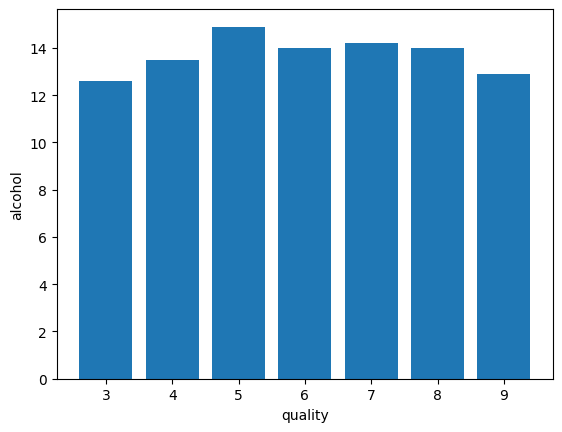

In [ ]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

#matplotlib's bar function for visualizing individual data points without any aggregation.

In [ ]:
#Replacing dummy variables
df['type']=pd.get_dummies(df['type'],drop_first=True)

#OR: df.replace({'white': 1, 'red': 0}, inplace=True)

<Axes: >

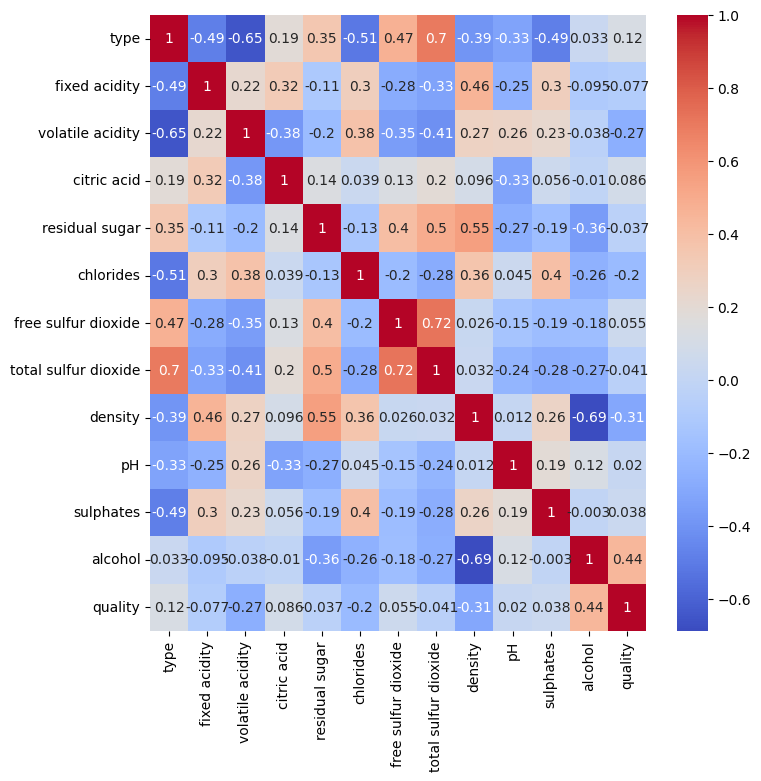

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

#Model Development

In [ ]:
df=df.drop('total sulfur dioxide', axis=1)

#the ‘total sulphur dioxide’ and ‘free sulphur dioxide‘ are highly correlated features so, I remove one of them

In [ ]:
df['best quality']=[1 if x>5 else 0 for x in df.quality]

In [ ]:
X=df.drop(['quality','best quality'], axis=1)
y=df['best quality']

In [ ]:
#Split our data to train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=40)

In [ ]:
X_train.shape, X_test.shape

((5197, 11), (1300, 11))

In [ ]:
#Normalizing data
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
#Training machine learning models
lr_model=LogisticRegression()

In [ ]:
lr_model.fit(X_train,y_train)
lr_prediction=lr_model.predict(X_test)

In [ ]:
xgbc_model=XGBClassifier()

In [ ]:
xgbc_model.fit(X_train,y_train)
xgbc_prediction=xgbc_model.predict(X_test)

In [ ]:
svc_model=SVC(kernel='rbf')
#The RBF kernel computes the similarity (or distance) between data points

In [ ]:
svc_model.fit(X_train,y_train)
svc_prediction=svc_model.predict(X_test)

#Model Evaluation

In [ ]:
#Calculating accuracy
print('LogisticRegression:')
print('Training Accuracy : ',metrics.roc_auc_score(y_train,lr_model.predict(X_train)))
print('Testing Accuracy : ',metrics.roc_auc_score(y_test,lr_prediction))
print('\n')
print('XGBClassifier:')
print('Training Accuracy : ',metrics.roc_auc_score(y_train,xgbc_model.predict(X_train)))
print('Testing Accuracy : ',metrics.roc_auc_score(y_test,xgbc_prediction))
print('\n')
print('SVC:')
print('Training Accuracy : ',metrics.roc_auc_score(y_train,svc_model.predict(X_train)))
print('Testing Accuracy : ',metrics.roc_auc_score(y_test,svc_prediction))

LogisticRegression:
Training Accuracy :  0.7054440673823565
Testing Accuracy :  0.6905315723766344


XGBClassifier:
Training Accuracy :  0.978186831573552
Testing Accuracy :  0.7986398580721467


SVC:
Training Accuracy :  0.718034727703236
Testing Accuracy :  0.701057888166108


In [ ]:
#Logistic Regression and SVC classifier performing better on the testing data with less difference between the testing and training data
#(there is no overfitting)

In [ ]:
#Calculating confusion matrix for Logistic Regression model
print('LogisticRegression:')
print(metrics.confusion_matrix(y_test,lr_prediction))

LogisticRegression:
[[244 201]
 [143 712]]


In [ ]:
#Calculating classification report for our best model
print('LogisticRegression:')
print(metrics.classification_report(y_test,lr_prediction))

LogisticRegression:
              precision    recall  f1-score   support

           0       0.63      0.55      0.59       445
           1       0.78      0.83      0.81       855

    accuracy                           0.74      1300
   macro avg       0.71      0.69      0.70      1300
weighted avg       0.73      0.74      0.73      1300

